In [4]:
!wget -P https://github.tik.uni-stuttgart.de/iss/dpr-assignments-2023/archive/refs/heads/master.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
!git clone https://github.com/Rajkiran1999/dpr_prac.git

Cloning into 'dpr_prac'...


(700, 2)
shape of xtrain 0 : (350, 2)
shape of ytrain 0 : (350,)


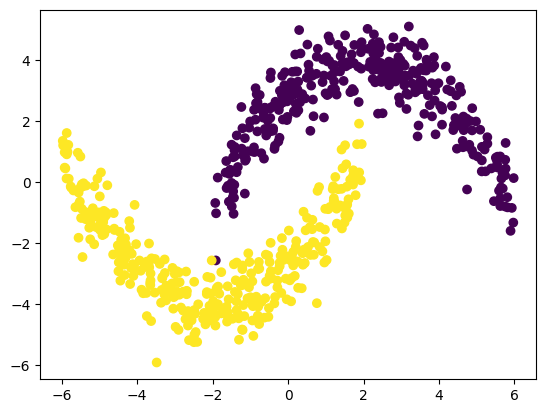

In [20]:
import numpy as np
import math
from sklearn.datasets import make_circles


def two_moons_dataset(size, training_split):
    """
    Creates a 2 moons dataset (corresponds to 'dataset 5' from lecture)
    :param size: number of total samples within the dataset
    :param training_split: ratio of samples used for training
    :return: dataset split into a training and a test set
    """
    # split size in half
    size1 = math.floor(size / 2)
    size2 = math.ceil(size / 2)

    # create first banana
    # TODO: Generate size1 samples for the first banana.
    x1_banana1 = np.random.uniform(-2,6,size1)
    x2_banana1 = -0.3 * (x1_banana1 - 2)**2 + 4 + (0.7 * np.random.standard_normal(len(x1_banana1)))

    # create second banana
    # TODO: Generate size2 samples for the second banana.
    x1_banana2 = np.random.uniform(-6,2,size1)
    x2_banana2 = 0.3 * (x1_banana2 + 2)**2 - 4 + (0.7 * np.random.standard_normal(len(x1_banana2)))

    # combine x1 and x2
    data1 = np.stack((x1_banana1, x2_banana1), axis=1)
    data2 = np.stack((x1_banana2, x2_banana2), axis=1)

    # create labels
    labels1 = np.zeros_like(x1_banana1)
    labels2 = np.ones_like(x1_banana2)

    # split dataset in train and test data
    n_train1 = round(training_split * size1)
    n_train2 = round(training_split * size2)
    x_train = np.concatenate((data1[:n_train1, :], data2[:n_train2, :]))
    y_train = np.concatenate((labels1[:n_train1], labels2[:n_train2]))
    x_test = np.concatenate((data1[n_train1:, :], data2[n_train2:, :]))
    y_test = np.concatenate((labels1[n_train1:], labels2[n_train2:]))

    print(np.shape(x_train))
    x_train0 = x_train[y_train == 0]
    print(f"shape of xtrain 0 : {np.shape(x_train[y_train==0])}")
    print(f"shape of ytrain 0 : {np.shape(y_train[y_train==0])}")

    return x_train, y_train, x_test, y_test


def four_parallel_dataset(size, training_split):
    """
    Creates a dataset consisting of four parallel distributions (corresponds to 'dataset 4' from lecture)
    :param size: number of total samples within the dataset
    :param training_split: ratio of samples used for training
    :return: dataset split into a training and a test set
    """
    # divide size by four
    size1 = math.floor(size / 4)
    size2 = math.ceil(size / 4)
    size3 = math.floor(size / 4)
    size4 = math.ceil(size / 4)

    # create distributions
    # TODO: Generate the four distributions containing size1, size2, size3 and size4 samples, respectively. Thereby,
    #       dist1 and dist3 correspond to class 0 and dist2 and dist4 correspond to class 1.
    x1_dist1 = np.random.normal(0, 1, size1)
    x2_dist1 = np.random.uniform(-1, 1, size1)
    x1_dist2 = np.random.normal(4, 1, size2)
    x2_dist2 = np.random.uniform(-1, 1, size2)
    x1_dist3 = np.random.normal(8, 1, size3)
    x2_dist3 = np.random.uniform(-1, 1, size3)
    x1_dist4 = np.random.normal(12, 1, size4)
    x2_dist4 = np.random.uniform(-1, 1, size4)

    # combine x1 and x2
    data1 = np.stack((x1_dist1, x2_dist1), axis=1)
    data2 = np.stack((x1_dist2, x2_dist2), axis=1)
    data3 = np.stack((x1_dist3, x2_dist3), axis=1)
    data4 = np.stack((x1_dist4, x2_dist4), axis=1)

    # create labels
    labels1 = np.zeros_like(x1_dist1)
    labels2 = np.ones_like(x1_dist2)
    labels3 = np.zeros_like(x1_dist3)
    labels4 = np.ones_like(x1_dist4)

    # split dataset in train and test data
    n_train1 = round(training_split * size1)
    n_train2 = round(training_split * size2)
    n_train3 = round(training_split * size3)
    n_train4 = round(training_split * size4)
    x_train = np.concatenate((data1[:n_train1, :], data2[:n_train2, :], data3[:n_train3, :], data4[:n_train4, :]))
    y_train = np.concatenate((labels1[:n_train1], labels2[:n_train2], labels3[:n_train3], labels4[:n_train4]))
    x_test = np.concatenate((data1[n_train1:, :], data2[n_train2:, :], data3[n_train3:, :], data4[n_train4:, :]))
    y_test = np.concatenate((labels1[n_train1:], labels2[n_train2:], labels3[n_train3:], labels4[n_train4:]))

    return x_train, y_train, x_test, y_test


def four_gaussian_dataset(size, training_split):
    """
    Creates a dataset consisting of four Gaussian distributions
    :param size: number of total samples within the dataset
    :param training_split: ratio of samples used for training
    :return: dataset split into a training and a test set
    """
    # divide size by four
    size1 = math.floor(size / 4)
    size2 = math.ceil(size / 4)
    size3 = math.floor(size / 4)
    size4 = math.ceil(size / 4)

    # create Gaussian distributions
    # TODO: Generate the four two-dimensional Gaussian distributions containing size1, size2, size3 and size4 samples,
    #       respectively. Thereby, data1 and data3 correspond to class 0 and data2 and data4 correspond to class 1.
    data1 = np.random.multivariate_normal([2, 2], np.identity(2), size1)
    data2 = np.random.multivariate_normal([-2, 2], np.identity(2), size2)
    data3 = np.random.multivariate_normal([-2, -2], np.identity(2), size1)
    data4 = np.random.multivariate_normal([2, -2], np.identity(2), size1)

    # create labels
    labels1 = np.zeros_like(data1[:, 0])
    labels2 = np.ones_like(data2[:, 0])
    labels3 = np.zeros_like(data3[:, 0])
    labels4 = np.ones_like(data4[:, 0])

    # split dataset in train and test data
    n_train1 = round(training_split * size1)
    n_train2 = round(training_split * size2)
    n_train3 = round(training_split * size3)
    n_train4 = round(training_split * size4)
    x_train = np.concatenate((data1[:n_train1, :], data2[:n_train2, :], data3[:n_train3, :], data4[:n_train4, :]))
    y_train = np.concatenate((labels1[:n_train1], labels2[:n_train2], labels3[:n_train3], labels4[:n_train4]))
    x_test = np.concatenate((data1[n_train1:, :], data2[n_train2:, :], data3[n_train3:, :], data4[n_train4:, :]))
    y_test = np.concatenate((labels1[n_train1:], labels2[n_train2:], labels3[n_train3:], labels4[n_train4:]))

    

    return x_train, y_train, x_test, y_test


def circular_dataset(size, training_split):
    """
    Creates a circular dataset (corresponds to 'dataset 2' from lecture)
    :param size: number of total samples within the dataset
    :param training_split: ratio of samples used for training
    :return: dataset split into a training and a test set
    """
    # split size in half
    size1 = math.floor(size / 2)
    size2 = math.ceil(size / 2)

    # create circular dataset
    # TODO: Use the function make_circles to generate the data. Thereby, set shuffle to False. Then scale the data and
    #       add two-dimensional standard normal distributed noise
    data, labels = make_circles(n_samples=size, noise = 0.01, factor=0,shuffle=False)
    data = 4 * data + np.random.randn(size,2)

    # split dataset in train and test data
    data1 = data[:size1, :]
    data2 = data[size1:, :]
    labels1 = labels[:size1]
    labels2 = labels[size1:]
    np.random.shuffle(data1)
    np.random.shuffle(data2)
    n_train1 = round(training_split * size1)
    n_train2 = round(training_split * size2)
    x_train = np.concatenate((data1[:n_train1, :], data2[:n_train2, :]))
    y_train = np.concatenate((labels1[:n_train1], labels2[:n_train2]))
    x_test = np.concatenate((data1[n_train1:, :], data2[n_train2:, :]))
    y_test = np.concatenate((labels1[n_train1:], labels2[n_train2:]))

    
    return x_train, y_train, x_test, y_test



x_train, y_train, x_test, y_test = two_moons_dataset(1000, 0.7)
import matplotlib.pyplot as plt
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)
#plt.scatter(x_test[:,0], x_test[:,1])
plt.show()

In [35]:
z = np.arange(1,21)
z = np.reshape(z,(2,10))
q = np.arange(21,41)
q = np.reshape(z,(2,10))
print(z)
print(q)
meanz = np.mean(z,axis = 0)
#meanz = np.reshape(meanz,(1,2))
print(meanz)
meanq = np.mean(q,axis = 0)
#meanq = np.reshape(meanq,(1,2))
print(meanq)

means = np.stack(meanz,meanq)
print(f"means = {means}")

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]]
[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]]
[ 6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
[ 6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


TypeError: only integer scalar arrays can be converted to a scalar index